# Natural Langauge Processing with Disaster Tweets

Filename: nlp-disaster.ipynb \
Author: Timothy Holland \
Last updated: 26/06/2024 \
Kaggle competition: https://www.kaggle.com/competitions/nlp-getting-started/overview

In [1]:
import pandas as pd

# Import the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Store the id of test in 'test_id'
test_id = test_df['id']
test_df = test_df.drop('id', axis=1)

# Drop id column from train
train_df = train_df.drop('id', axis=1)

# Verify the changes
print("Train DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())
print("\nTest IDs:")
print(test_id.head())

Train DataFrame:
  keyword location                                               text  target
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1

Test DataFrame:
  keyword location                                               text
0     NaN      NaN                 Just happened a terrible car crash
1     NaN      NaN  Heard about #earthquake is different cities, s...
2     NaN      NaN  there is a forest fire at spot pond, geese are...
3     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

Test IDs:
0     0
1     2
2     3
3     9
4    11
Name: id, dtype: int64


Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   keyword     7552 non-null   object
 1   location    5080 non-null   object
 2   text        7613 non-null   object
 3   target      7613 non-null   int64 
 4   word_count  7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   3237 non-null   object
 1   location  2158 non-null   object
 2   text      3263 non-null   object
dtypes: object(3)
memory usage: 76.6+ KB
None

Train Dataset Summary Statistics:
           target   word_count
count  7613.00000  7613.000000
mean      0.42966    14.903586
std       0.49506     5.732604
min       0.0000

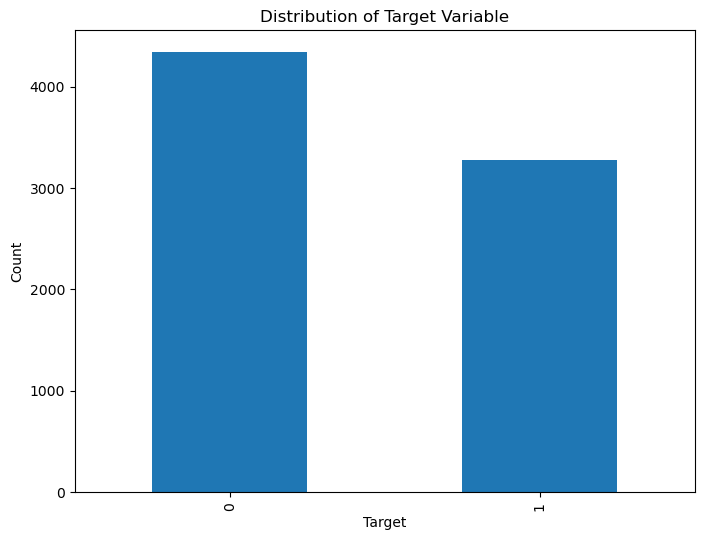

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


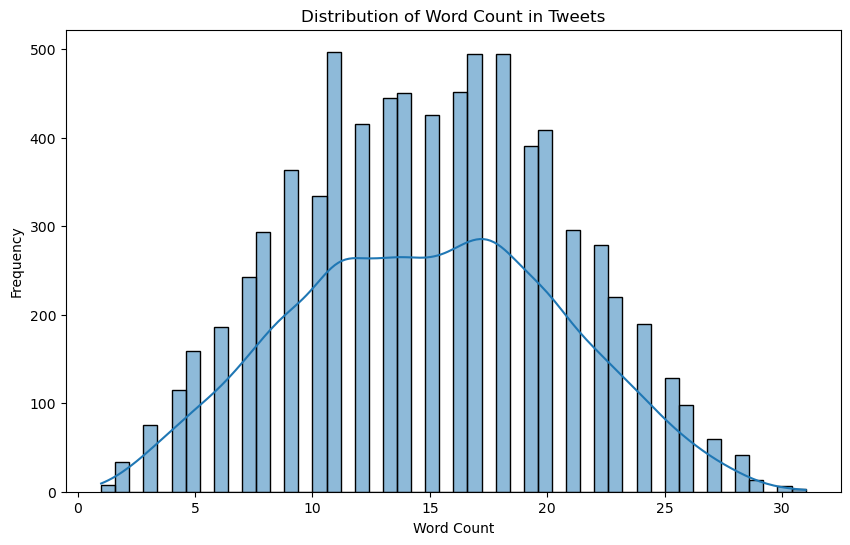

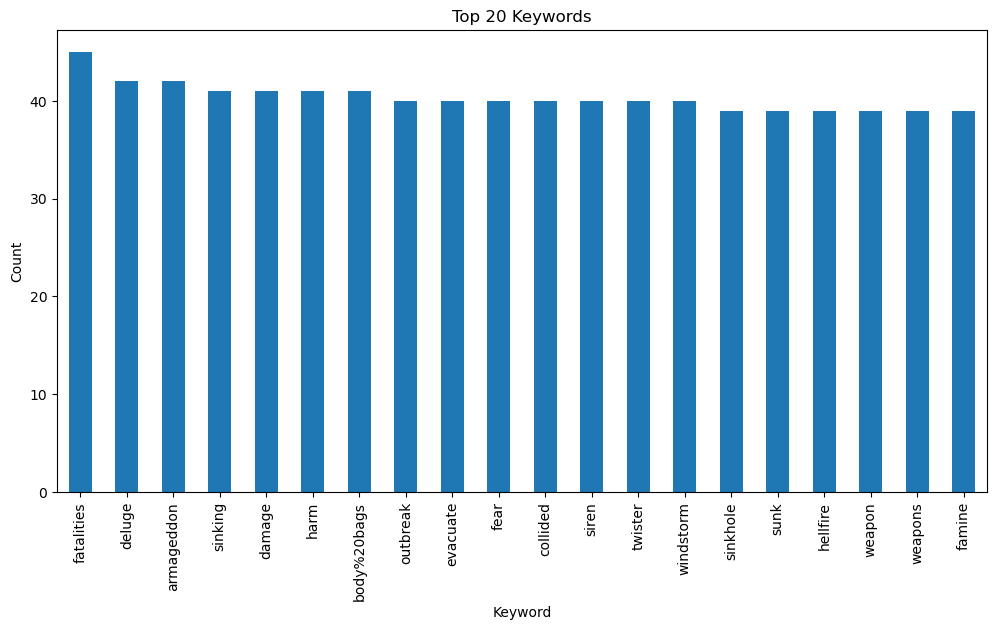

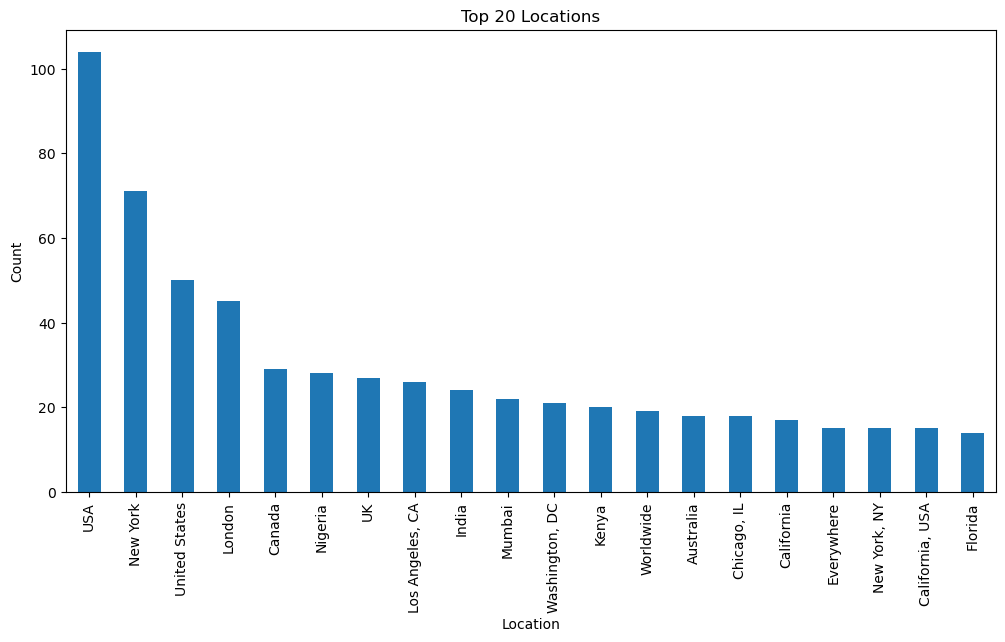

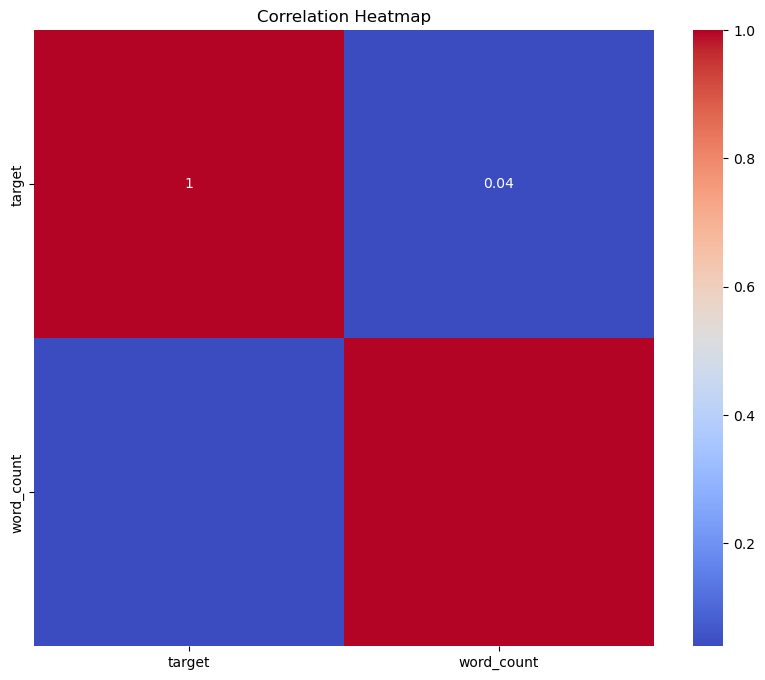


Sample Tweets:
0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

Unique values in keyword: 221
Top 5 most common keywords:
keyword
fatalities    45
deluge        42
armageddon    42
sinking       41
damage        41
Name: count, dtype: int64

Unique values in location: 3341
Top 5 most common locations:
location
USA              104
New York          71
United States     50
London            45
Canada            29
Name: count, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Basic information about the datasets
print("Train Dataset Info:")
print(train_df.info())
print("\nTest Dataset Info:")
print(test_df.info())

# 2. Summary statistics
print("\nTrain Dataset Summary Statistics:")
print(train_df.describe())

# 3. Check for missing values
print("\nMissing Values in Train Dataset:")
print(train_df.isnull().sum())
print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())

# 4. Distribution of target variable (only in train dataset)
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# 5. Word count distribution in tweets
train_df['word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(train_df['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 6. Top keywords
plt.figure(figsize=(12, 6))
train_df['keyword'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Keywords')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 7. Location analysis
plt.figure(figsize=(12, 6))
train_df['location'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 8. Correlation between features (for numerical columns)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
    
# 9. Sample tweets
print("\nSample Tweets:")
print(train_df['text'].head())

# 10. Unique values in categorical columns
for col in ['keyword', 'location']:
    print(f"\nUnique values in {col}:", train_df[col].nunique())
    print(f"Top 5 most common {col}s:")
    print(train_df[col].value_counts().head())

#### Addressing missing values

In [9]:
# Create a copy of the train and test datasets
X_train_imputed = train_df.copy()
X_test_imputed = test_df.copy()

# Fill missing values in the 'keyword' column with 'missing_keyword'
X_train_imputed['keyword'].fillna('missing_keyword', inplace=True)
X_test_imputed['keyword'].fillna('missing_keyword', inplace=True)

# Fill missing values in the 'location' column with 'missing_location'
X_train_imputed['location'].fillna('missing_location', inplace=True)
X_test_imputed['location'].fillna('missing_location', inplace=True)

# Verify the changes
print("Train Dataset (Imputed):")
print(X_train_imputed.head())
print("\nTest Dataset (Imputed):")
print(X_test_imputed.head())

print("\nMissing Values in Train Dataset (Imputed):")
print(X_train_imputed.isnull().sum())

print("\nMissing Values in Test Dataset (Imputed):")
print(X_test_imputed.isnull().sum())

Train Dataset (Imputed):
           keyword          location  \
0  missing_keyword  missing_location   
1  missing_keyword  missing_location   
2  missing_keyword  missing_location   
3  missing_keyword  missing_location   
4  missing_keyword  missing_location   

                                                text  target  word_count  
0  Our Deeds are the Reason of this #earthquake M...       1          13  
1             Forest fire near La Ronge Sask. Canada       1           7  
2  All residents asked to 'shelter in place' are ...       1          22  
3  13,000 people receive #wildfires evacuation or...       1           8  
4  Just got sent this photo from Ruby #Alaska as ...       1          16  

Test Dataset (Imputed):
           keyword          location  \
0  missing_keyword  missing_location   
1  missing_keyword  missing_location   
2  missing_keyword  missing_location   
3  missing_keyword  missing_location   
4  missing_keyword  missing_location   

                  

#### Embedding keyword

In [21]:
from gensim.models import Word2Vec

# Prepare the data for training the 'keyword' embedding model
keyword_sentences = [str(keyword).split() for keyword in X_train_imputed['keyword'].astype(str)]

# Train the Word2Vec model for 'keyword'
keyword_embedding_model = Word2Vec(keyword_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Create a dictionary mapping keywords to their embedding vectors
keyword_embedding_dict = {keyword: keyword_embedding_model.wv[keyword] for keyword in keyword_embedding_model.wv.key_to_index}

# Replace the 'keyword' column with the corresponding embedding vectors
X_train_encoded = X_train_imputed.copy()
X_train_encoded['keyword'] = X_train_encoded['keyword'].map(keyword_embedding_dict)

# Repeat the process for the test dataset
X_test_encoded = X_test_imputed.copy()
X_test_encoded['keyword'] = X_test_encoded['keyword'].map(keyword_embedding_dict)

#### Emebedding location

In [22]:
from gensim.models import Word2Vec

# Prepare the data for training the 'location' embedding model
location_sentences = [str(location).split() for location in X_train_imputed['location'].astype(str)]

# Train the Word2Vec model for 'location'
location_embedding_model = Word2Vec(location_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Create a dictionary mapping locations to their embedding vectors
location_embedding_dict = {location: location_embedding_model.wv[location] for location in location_embedding_model.wv.key_to_index}

# Replace the 'location' column with the corresponding embedding vectors
X_train_encoded['location'] = X_train_encoded['location'].map(location_embedding_dict)

# Repeat the process for the test dataset
X_test_encoded['location'] = X_test_encoded['location'].map(location_embedding_dict)

#### Text

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Lowercase conversion
    text = text.lower()
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to the text column
X_train_encoded['preprocessed_text'] = X_train_encoded['text'].apply(preprocess_text)
X_test_encoded['preprocessed_text'] = X_test_encoded['text'].apply(preprocess_text)

# Display a sample of preprocessed text
print(X_train_encoded[['text', 'preprocessed_text']].head())

[nltk_data] Downloading package punkt to /Users/timmy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/timmy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/timmy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  Our Deeds are the Reason of this #earthquake M...   
1             Forest fire near La Ronge Sask. Canada   
2  All residents asked to 'shelter in place' are ...   
3  13,000 people receive #wildfires evacuation or...   
4  Just got sent this photo from Ruby #Alaska as ...   

                                   preprocessed_text  
0         deed reason earthquake may allah forgive u  
1              forest fire near la ronge sask canada  
2  resident asked shelter place notified officer ...  
3  people receive wildfire evacuation order calif...  
4  got sent photo ruby alaska smoke wildfire pour...  
